# SYMBOLIC STUDY
## **CHASSIS**
------------------------------------

### **IMPORTANT NOTES**
#### **COLAB Machine Setup**
If starting a new Colab session, Please open the [colab_setup.ipynb](https://colab.research.google.com/github/khaledghobashy/smbd/blob/master/examples/colab_setup.ipynb) and follow the instructions there.
A new Colab session does not mean a new notebook session, you can have various notebook sessions on the same Colab session. The Colab session linked to your Google account expires in 12 hours, and so any data saved on that remote machine will be lost.</br>
When you run the first cell, Colab will prompt a warning that *"This notebook was not authored by Google."* and that it is loaded from GitHub. Un-check the **Reset all runtimes before running** then press **RUN ANYWAY**.

#### **Package Path.**
*This step is temporary unitll the package can be installed via conda and/or pip*
- **Colab**. </br>
For a Cloab session, the ```pkg_path``` variable is the one relevant to the repository path on the Colab remote machine. This should be used if you are running the notebook on Colab.
- **Local Machine**. </br>
The ```pkg_path``` variable is where I have the repository on my machine. You should change it to where you cloned the repository on your machine.

#### **Projects Directory**
- **Colab**.</br>
The ```projects_dir``` variable should not be changed.
- **Local Machine**. </br>
The ```projects_dir``` should be changed to match your desired directory where you store your projects.

--------------------------------------------------------------

## **SYSTEM DESCRIPTION**
-------------------------

### **Important Note**
The tool uses [euler-parameters](https://en.wikibooks.org/wiki/Multibody_Mechanics/Euler_Parameters) -which is a 4D unit quaternion- to represents bodies orientation in space. This makes the generalized coordinates used to fully define a body in space to be **7,** instead of **6**, it also adds an algebraic equation to the constraints that ensures the unity/normalization of the body quaternion. This is an important remark as the calculations of the degrees-of-freedom depends on it.

### **Summary**

### **Topology Layout**

---------------------------------------------------------------
---------------------------------------------------------------

### Colab Session
*Run if in a Colab Session Only!*

In [2]:
import sys
pkg_path = '/content/smbd'
sys.path.append(pkg_path)

database_directory = '/content/projects'

### Local Session
*Run if on your Local Machine!*</br>
*Do not forget to change the variables below as illustrated in the notes!*

In [1]:
import sys
pkg_path = '/home/khaledghobashy/Documents/smbd'
sys.path.append(pkg_path)

database_directory = '/home/khaledghobashy/Documents/smbd/examples/template_based_models/car_database'

In [1]:
import sys
pkg_path = r'C:\Users\ali.mohamed\Desktop\smbd'
sys.path.append(pkg_path)

database_directory = r'C:\Users\ali.mohamed\Desktop\smbd\examples\template_based_models\car_database'

---------------------------------------------------------------
---------------------------------------------------------------

## **SYMBOLIC TOPOLOGY**
------------------------

In this section, we create the symbolic topology that captures the topological layout that we just discussed.</br>
Defining the topology is very simple. We start by importing the ```template_topology``` class and create a new instance that represents our symbolic model. Then we start adding the components we discussed earlier, starting by the bodies, then the joints, actuators and forces, and thats it.</br>
These components will be represented symbolically, and therefore there is no need for any numerical inputs at this step.

The system is stored in a form of a network graph that stores all the data needed for the assemblage of the system equations later. But even before the assemblage process, we can gain helpful insights about our system as well be shown.


In [2]:
import os
from smbd.systems import assembly, load_pickled_data

In [3]:
templates_dir = os.path.join(database_directory, 'symenv', 'templates', 'objects')

In [4]:
model_name = 'rolling_chassis'
sym_model  = assembly(model_name)

In [5]:
suspension = load_pickled_data(os.path.join(templates_dir, 'dwb_bc_pushrod.stpl'))
suspension.assemble()

steering = load_pickled_data(os.path.join(templates_dir, 'steering_rack.stpl'))
steering.assemble()

chassis = load_pickled_data(os.path.join(templates_dir, 'chassis.stpl'))
chassis.assemble()

### Adding Subsystems

In [6]:
sym_model.add_subsystem('AX1', suspension)
sym_model.add_subsystem('AX2', suspension)
sym_model.add_subsystem('ST1', steering)
sym_model.add_subsystem('CH', chassis)

### Mapping Virtual Bodies

In [7]:
sym_model.assign_virtual_body('AX1.vbs_chassis', 'CH.rbs_chassis')
sym_model.assign_virtual_body('AX2.vbs_chassis', 'CH.rbs_chassis')
sym_model.assign_virtual_body('ST1.vbs_chassis', 'CH.rbs_chassis')

sym_model.assign_virtual_body('AX1.vbr_steer', 'ST1.rbs_rack')
sym_model.assign_virtual_body('AX2.vbr_steer', 'CH.rbs_chassis')

### Assembling

C:\Users\ali.mohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


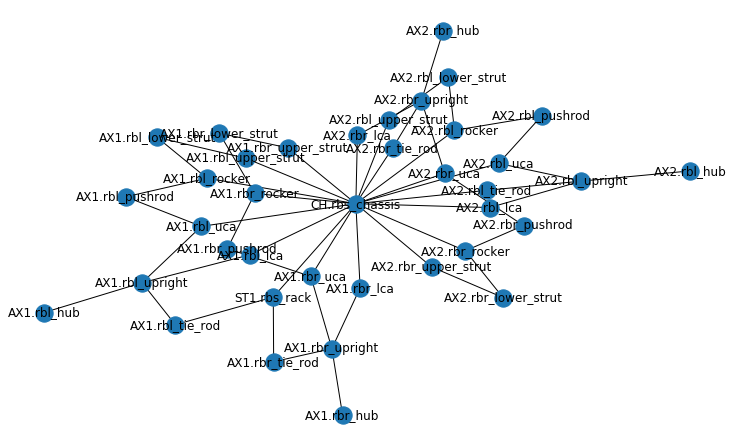

In [8]:
sym_model.assemble()
sym_model.draw_constraints_topology()

---------------------------------------------------------------
---------------------------------------------------------------

## **CODE GENERATION**
----------------------

This step aims to create a valid code that can be used for numerical simulation. We will use the ***python code generators*** to create a valid numerical simulation environment in python.</br>
Theoretically, the symbolic environment is uncoupled from the simulation environment, which opens the door to create various simulation environments that can be in any language.

In [9]:
from smbd.numenv.python.codegen.generators import assembly_codegen

In [10]:
code_dir = os.path.join(database_directory, 'numenv','python', 'models','assemblies')

python_code = assembly_codegen(sym_model.topology)
python_code.write_code_file(code_dir)

File full path : C:\Users\ali.mohamed\Desktop\smbd\examples\template_based_models\car_database\numenv\python\models\assemblies\rolling_chassis.py


In [12]:
sym_model.topology.nve

158